# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregando a base de dados e visualizando algumas informações
df = pd.read_csv("previsao_de_renda.csv")
df = df.drop('Unnamed: 0', axis=1)
df.head(4)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69


In [3]:
# verificando quais colunas são de valores quantitativos
df_numerico = df.select_dtypes(include=['number'])
df_numerico = df_numerico.drop('index', axis=1)
df_numerico

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


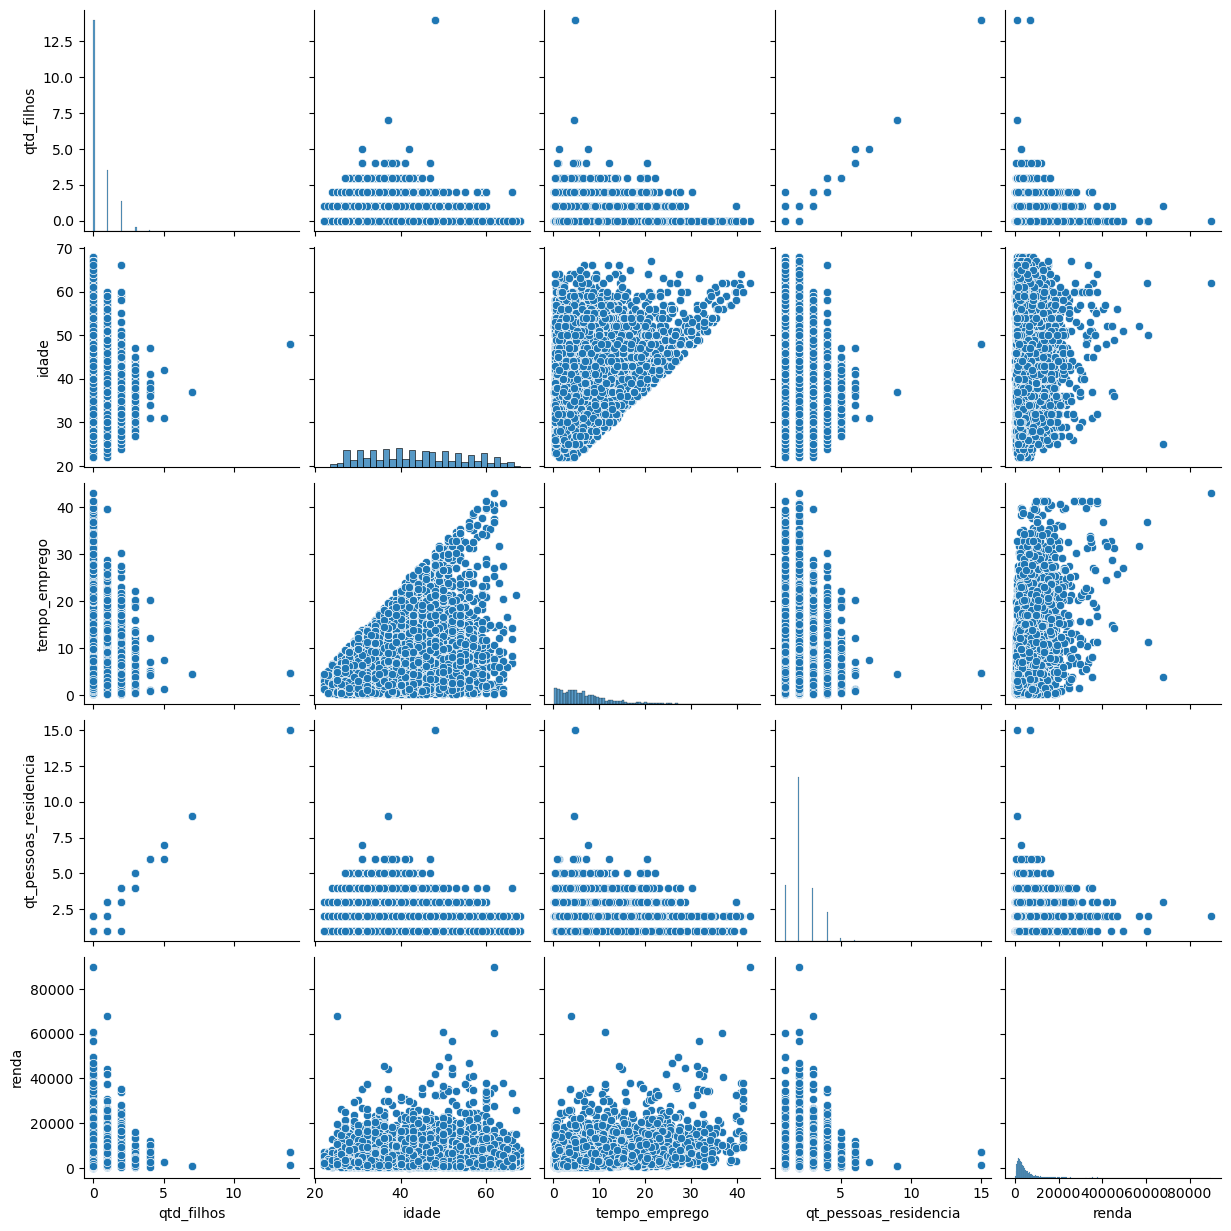

In [4]:
# Visualizando alguns gráficos para entender as relações entre as variáveis
sns.pairplot(df_numerico)

Text(0.5, 1.0, 'Matriz de Correlações')

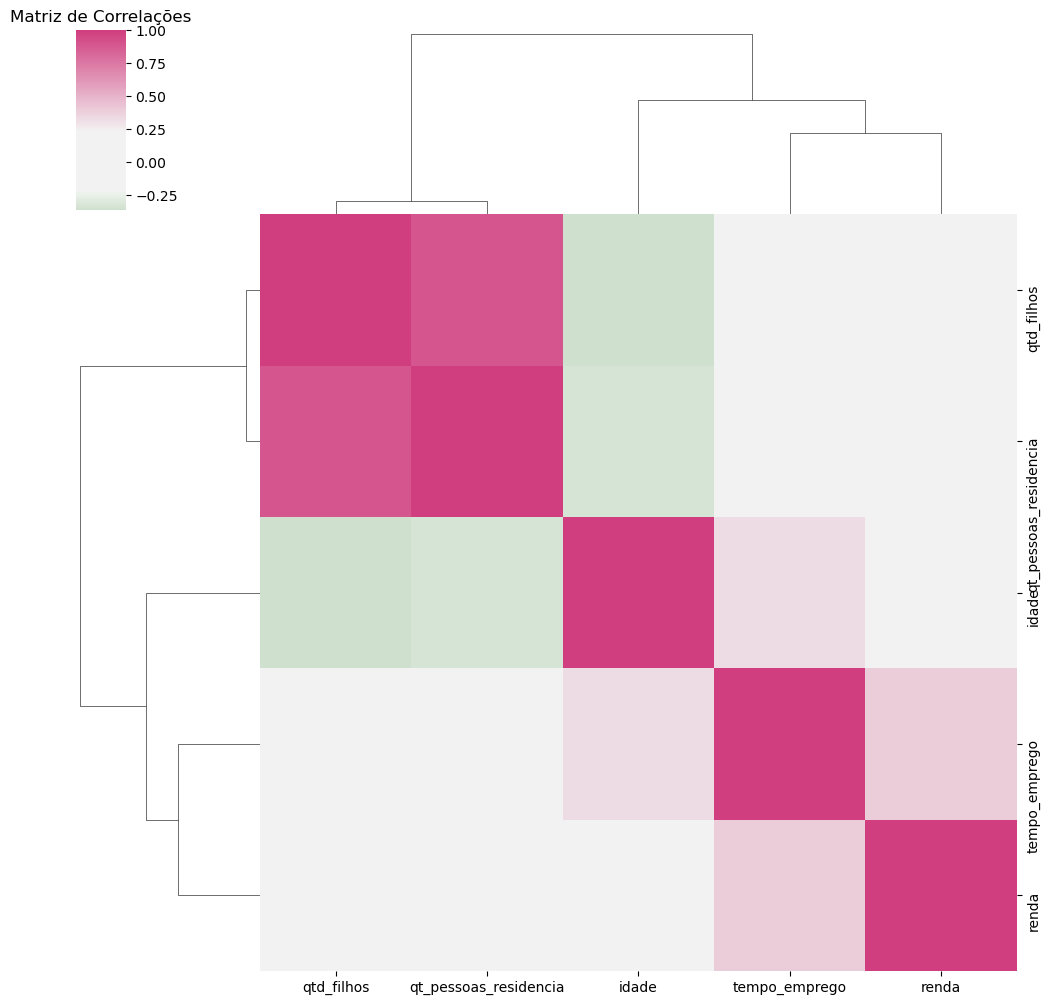

In [11]:
# Criando uma matriz de correlação por um mapa de calor
correlation_matrix = df_numerico.corr()

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(correlation_matrix, figsize=(10, 10), center = 0, cmap=cmap)
plt.title("Matriz de Correlações")



Abaixo alguns dos padrões que consegui identificar:

 - A relação entre tempo de emprego e renda é uma relação sólida, a renda tende a ser maior proporcionalmente ao tempo de emprego;
 - Existe uma relação alta entre a quantidade de pessoas na residência e quantidade de filhos;
 - As variáveis tempo de emprego e idade tem uma relação considerável;
 - A variável de renda não tem relacionamento com as váriaveis quantidade de fihos, quantidade de pessoas na residência e idade;
 - Entre as variaveis quantidade de filhos e idade, existe uma relação negativa;


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='renda', ylabel='tempo_emprego'>

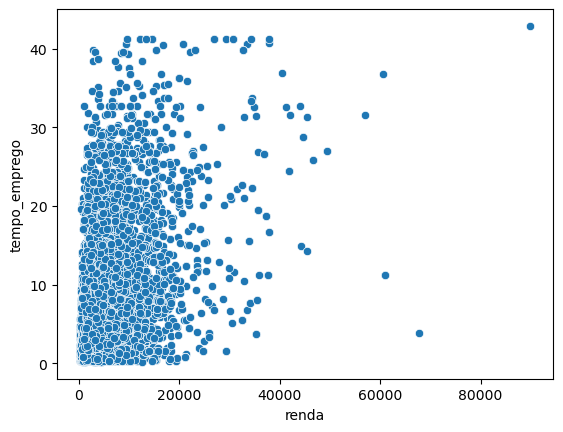

In [12]:
# Plotando o gráfico de variaveis númericas com maior correlação com renda; Renda x tempo_emprego
sns.scatterplot(df_numerico, x='renda', y='tempo_emprego')

<Axes: xlabel='renda', ylabel='idade'>

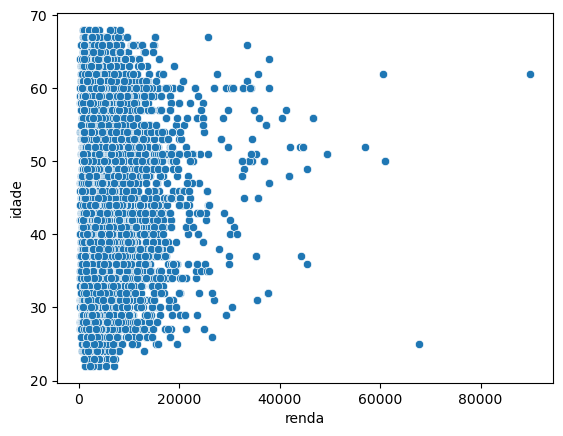

In [13]:
# Plotando o gráfico de variaveis númericas com maior correlação com renda; Renda x tempo_emprego
sns.scatterplot(df_numerico, x='renda', y='idade')

3) Na su aopinião, há outliers na variável renda?

Através dos gráficos apresentados anteriormente, acredito que existem sim outliers na variável renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [14]:
# Calculando o log da variável Renda
df_log = df.copy()
df_log['log_renda'] = np.log(df['renda'])

<Axes: xlabel='log_renda', ylabel='tempo_emprego'>

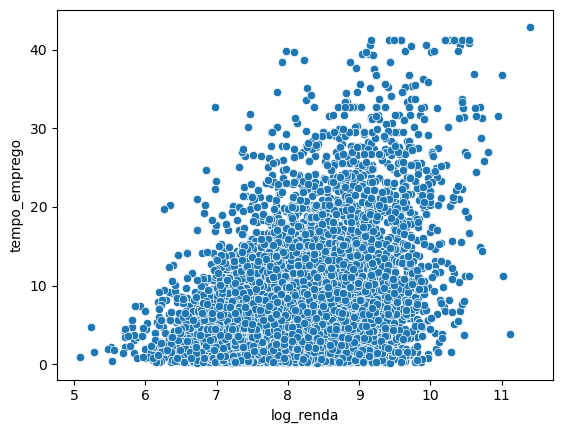

In [16]:
# Plotando o gráfico das váriaveis log_renda e tempo_emprego
sns.scatterplot(df_log, x='log_renda', y='tempo_emprego')

<Axes: xlabel='log_renda', ylabel='idade'>

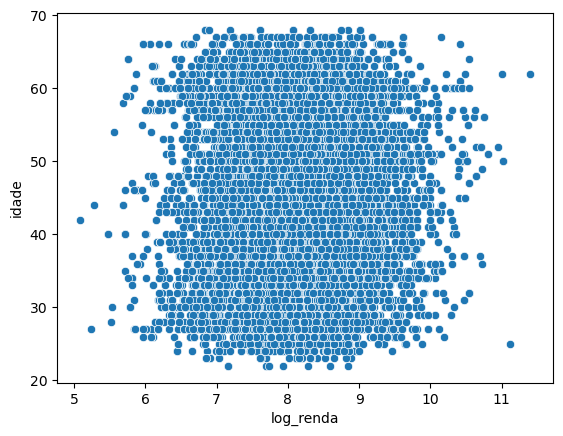

In [17]:
# Plotando o gráfico das váriaveis log_renda e idade
sns.scatterplot(df_log, x='log_renda', y='idade')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Na minha visão, com o log foi possível ordenar o padrão para uma melhor análise, mesmo com a existência de outliers.